# Exercises Week 7 in 02506: Layered Surfaces

This week we will dive into deformable models where we will separate a foreground from a background.
<p align="center"> 
  <img src="images/rammed-earth-layers-limestone.JPG" width="500" title="Layers in Limestone">
</p>

## Imports

In [2]:
import numpy as np
from skimage.io import imread, imshow, imsave
import matplotlib.pyplot as plt
from skimage import color
import matplotlib.pyplot as plt
import skimage.io 
import slgbuilder


## 1. Run the script on_surface_cost_example which demonstrates the use of on-surface cost. 
In this case we want to detect dark lines, so
for on-surface cost we use image intensities. Get familiar with the
functions for computing the optimal solution.

Text(0.5, 1.0, 'input image')

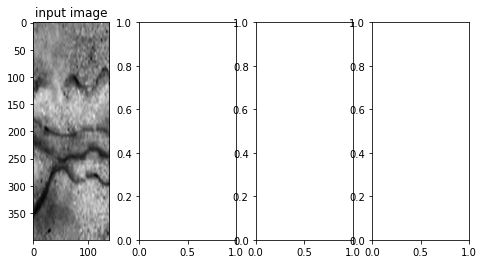

In [3]:
I = imread('./images/layers_A.png').astype(np.int32)

fig, ax = plt.subplots(1,4,figsize=(8,4))
ax[0].imshow(I, cmap='gray')
ax[0].set_title('input image')

Text(0.5, 1.0, 'delta = 3')

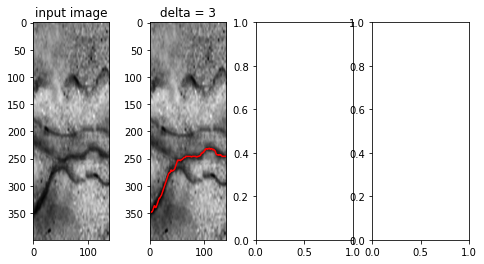

In [4]:
delta1 = 3

layer = slgbuilder.GraphObject(I)
helper = slgbuilder.MaxflowBuilder()
helper.add_object(layer)
helper.add_layered_boundary_cost()
helper.add_layered_smoothness(delta=delta1, wrap=False)

helper.solve()
segmentation = helper.what_segments(layer)
segmentation_line = segmentation.shape[0] - np.argmax(segmentation[::-1,:], axis=0) - 1

fig, ax = plt.subplots(1,4,figsize=(8,4))
ax[0].imshow(I, cmap='gray')
ax[0].set_title('input image')
ax[1].imshow(I, cmap='gray')
ax[1].plot(segmentation_line, 'r')
ax[1].set_title(f'delta = {delta1}')

Text(0.5, 1.0, 'delta = 1')

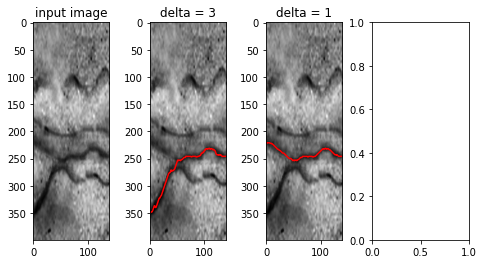

In [5]:
delta2 = 1

layer = slgbuilder.GraphObject(I)
helper = slgbuilder.MaxflowBuilder()
helper.add_object(layer)
helper.add_layered_boundary_cost()
helper.add_layered_smoothness(delta=delta2, wrap=False)

helper.solve()
segmentation = helper.what_segments(layer)
segmentation_line2 = segmentation.shape[0] - np.argmax(segmentation[::-1,:], axis=0) - 1

fig, ax = plt.subplots(1,4,figsize=(8,4))
ax[0].imshow(I, cmap='gray')
ax[0].set_title('input image')
ax[1].imshow(I, cmap='gray')
ax[1].plot(segmentation_line, 'r')
ax[1].set_title(f'delta = {delta1}')
ax[2].imshow(I, cmap='gray')
ax[2].plot(segmentation_line2, 'r')
ax[2].set_title(f'delta = {delta2}')

Text(0.5, 1.0, 'Three dark lines')

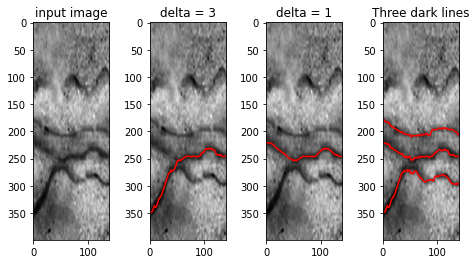

In [6]:
layers = [slgbuilder.GraphObject(I), slgbuilder.GraphObject(I),slgbuilder.GraphObject(I)]
delta3 = 3

helper = slgbuilder.MaxflowBuilder()
helper.add_objects(layers)
helper.add_layered_boundary_cost()
helper.add_layered_smoothness(delta=delta3, wrap=False)  
helper.add_layered_containment(layers[0], layers[1], min_margin=25)
helper.add_layered_containment(layers[1], layers[2], min_margin=40)

helper.solve()
segmentations = [helper.what_segments(l).astype(np.int32) for l in layers]
segmentation_lines = [s.shape[0] - np.argmax(s[::-1,:], axis=0) - 1 for s in segmentations]

fig, ax = plt.subplots(1,4,figsize=(8,4))
ax[0].imshow(I, cmap='gray')
ax[0].set_title('input image')
ax[1].imshow(I, cmap='gray')
ax[1].plot(segmentation_line, 'r')
ax[1].set_title(f'delta = {delta1}')
ax[2].imshow(I, cmap='gray')
ax[2].plot(segmentation_line2, 'r')
ax[2].set_title(f'delta = {delta2}')
ax[3].imshow(I, cmap='gray')
for line in segmentation_lines:
    ax[3].plot(line, 'r')
ax[3].set_title('Three dark lines')

## 2. Run the script in_region_cost_example which demonstrates the use of in-region cost. 
In this case we want to separate the dark and the
brigth regions, so for in-regions cost of dark region we use image
intensities I, while for bright region we use 255 − I. Get familiar
with the functions for computing the optimal solution and passing
the region costs to the solver.

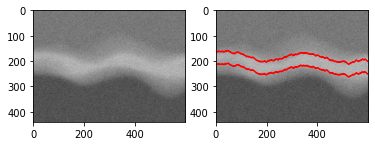

In [7]:
I = skimage.io.imread('./images/peaks_image.png').astype(np.int32)

fig, ax = plt.subplots(1,2)
ax[0].imshow(I, cmap='gray')


layers = [slgbuilder.GraphObject(0*I), slgbuilder.GraphObject(0*I)] # no on-surface cost
helper = slgbuilder.MaxflowBuilder()
helper.add_objects(layers)

# Addin regional costs, 
# the region in the middle is bright compared to two darker regions.
helper.add_layered_region_cost(layers[0], I, 255-I)
helper.add_layered_region_cost(layers[1], 255-I, I)

# Adding geometric constrains
helper.add_layered_boundary_cost()
helper.add_layered_smoothness(delta=1, wrap=False)  
helper.add_layered_containment(layers[0], layers[1], max_margin=50)

# Cut
helper.solve()
segmentations = [helper.what_segments(l).astype(np.int32) for l in layers]
segmentation_lines = [s.shape[0] - np.argmax(s[::-1,:], axis=0) - 1 for s in segmentations]

# Visualization
ax[1].imshow(I, cmap='gray')
for line in segmentation_lines:
    ax[1].plot(line, 'r')


## 3. Inspect the image rammed-earth-layers-limestone.jpg. 
Use the layered surface detction to detect the darkest line in the image,
shown red in Figure 7.3. Then, detect two dark lines (blue and red
line in the figure). Finally, detect the lines partitioning the dark
regions, as shown in green in Figure 7.3.

In [16]:
I = imread('./images/rammed-earth-layers-limestone.jpg').astype(np.int32)

dark_layers = [slgbuilder.GraphObject(I), slgbuilder.GraphObject(I)]
delta = 1

dark = slgbuilder.MaxflowBuilder()
dark.add_objects(dark_layers)
dark.add_layered_boundary_cost()
dark.add_layered_smoothness(delta=delta, wrap=False)  
dark.add_layered_containment(dark_layers[0], dark_layers[1], min_margin=25)

dark.solve()
seg_dark = [dark.what_segments(l).astype(np.int32) for l in dark_layers]
dark_lines = [s.shape[0] - np.argmax(s[::-1,:], axis=0) - 1 for s in seg_dark]

bright_layers = [slgbuilder.GraphObject(0*I), slgbuilder.GraphObject(0*I)] # no on-surface cost
bright = slgbuilder.MaxflowBuilder()
bright.add_objects(bright_layers)

# Addin regional costs, 
# the region in the middle is bright compared to two darker regions.
bright.add_layered_region_cost(bright_layers[0],255-I, I)
bright.add_layered_region_cost(bright_layers[1],I, 255-I)

# Adding geometric constrains
bright.add_layered_boundary_cost()
bright.add_layered_smoothness(delta=1, wrap=False)  
bright.add_layered_containment(bright_layers[0], bright_layers[1], min_margin=40)

# Cut
bright.solve()
seg_bright = [bright.what_segments(l).astype(np.int32) for l in bright_layers]
bright_lines = [s.shape[0] - np.argmax(s[::-1,:], axis=0) - 1 for s in seg_bright]

fig, ax = plt.subplots(1,3,figsize=(12,8))
ax[0].imshow(I, cmap='gray')
ax[0].set_title('input image')
ax[1].imshow(I, cmap='gray')
ax[1].plot(dark_lines[0], 'r')
ax[1].plot(dark_lines[1], 'b')
ax[1].set_title('Two dark lines')
ax[2].imshow(I, cmap='gray')
ax[2].plot(bright_lines[0], 'g')
ax[2].plot(bright_lines[1], 'g')
ax[2].set_title('Two bright lines')